In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
dri = pd.read_csv(r"C:\Users\admin\Downloads\driver-data.csv")

In [3]:
dri.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
features = dri.drop('id',axis=1)

In [5]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [14]:
k_mean = KMeans(n_clusters=4)

In [15]:
cluster = k_mean.fit(features)

In [16]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [17]:
cluster.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [18]:
dri['cluster'] = cluster.labels_

In [19]:
dri

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [20]:
dri[dri['cluster']==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
3200,3423314190,179.22,95,2
3201,3423314144,192.34,69,2
3202,3423314442,140.25,92,2
3203,3423313001,184.28,70,2
3204,3423311047,200.58,50,2
...,...,...,...,...
3315,3423313871,177.20,87,2
3316,3423310955,182.40,83,2
3317,3423314016,189.88,97,2
3318,3423310913,214.17,73,2


In [21]:
sns.lmplot(data=dri,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

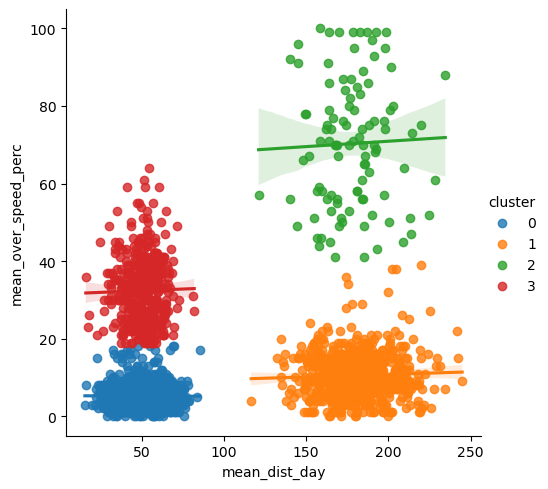

In [24]:
plt.show()

In [25]:
w = []
for i in range(1,11):
    k_m = KMeans(n_clusters=i)
    k_m.fit(features)
    w.append(k_m.inertia_)